In [1]:
# coding: utf

#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

#엑셀데이터를 데이터 프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/ESAA/data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

Mounted at /content/drive


In [2]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
#누락값(nan)을 앞 데이터로 채움(엑셀 양식병합부분)
df = df.fillna(method='ffill')
#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [4]:
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [5]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

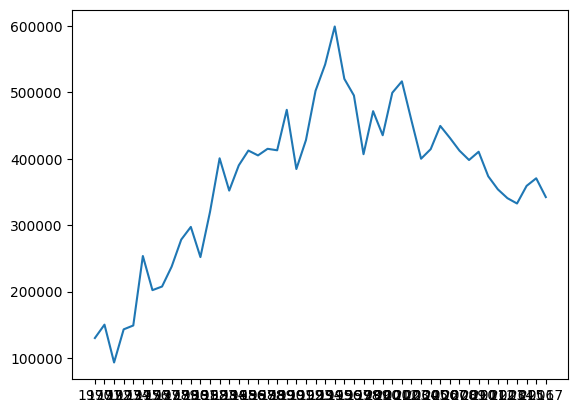

In [6]:
#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

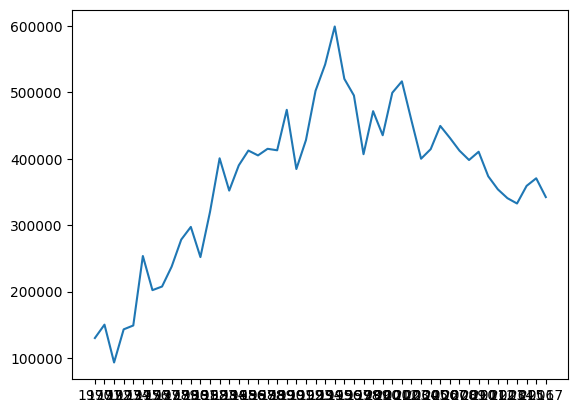

In [7]:
#판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

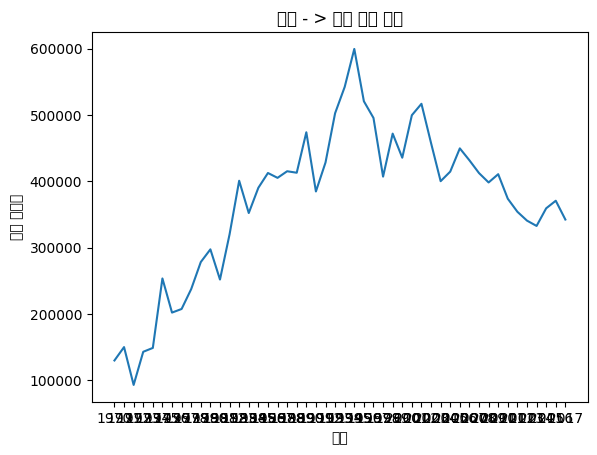

In [8]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울 - > 경기 인구 이동' )

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() #변경사항 저장하고 그래프 출력

matplotlib 한글 폰트 오류 해결

#한글 폰트 오류 해결

from matplotlib import font_manager, rc

font_path = "/content/drive/MyDrive/ESAA/

data/malgun.ttf" #폰트파일위치

font_name = font_manager.FontProperties(fname=font_path).get_name()

rc('font', family=font_name)

In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

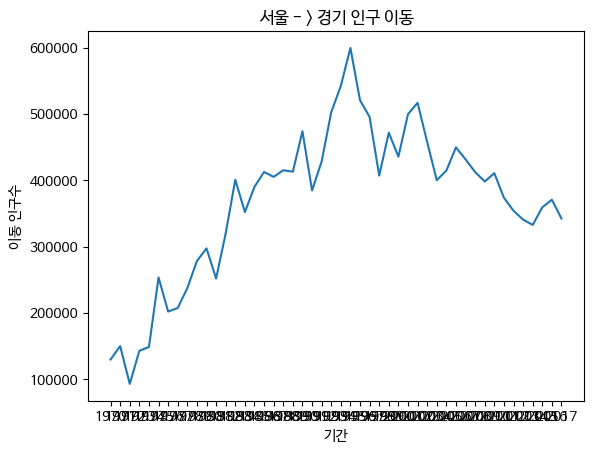

In [1]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#엑셀데이터를 데이터 프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/ESAA/data/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header=0)

#누락값(nan)을 앞 데이터로 채움(엑셀 양식병합부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지', inplace=True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울 - > 경기 인구 이동' )

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() #변경사항 저장하고 그래프 출력

그래프 꾸미기

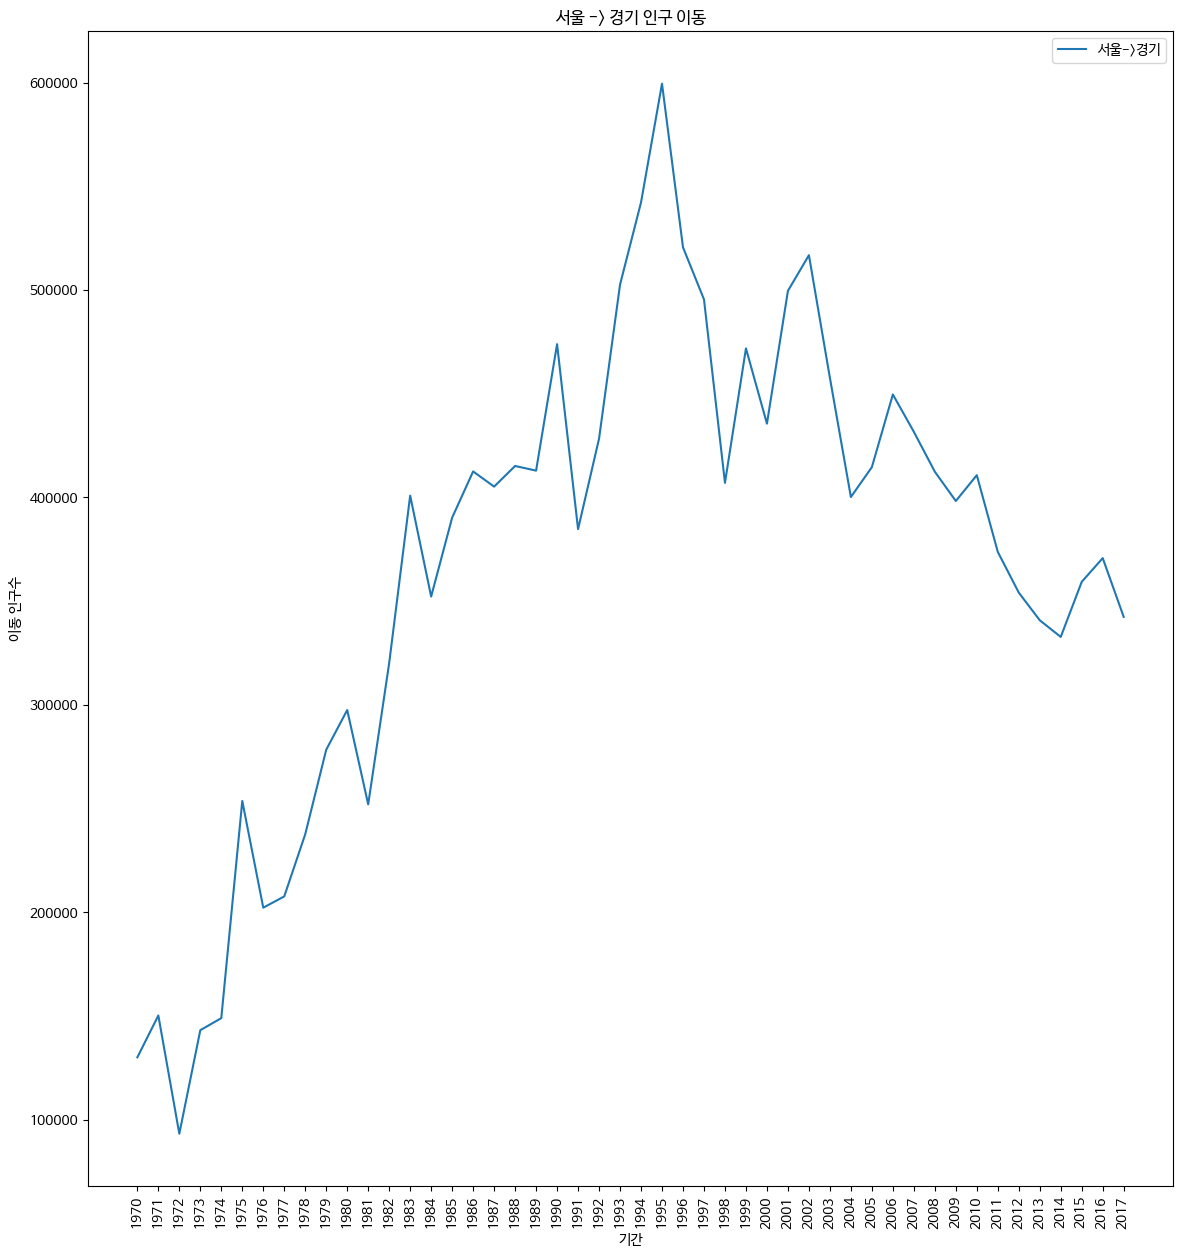

In [2]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#그림 사이즈로 지정(가로14인치 세로15인치)
plt.figure(figsize=(14,15))

#x축 눈금라벨 회전하기
plt.xticks(rotation='vertical')

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') #차트제목
plt.xlabel('기간') #x축 이름
plt.ylabel('이동 인구수') #y축 이름
plt.legend(labels=['서울->경기'], loc='best') #범례표시

plt.show() #변경사항 저장하고 그래프 출력

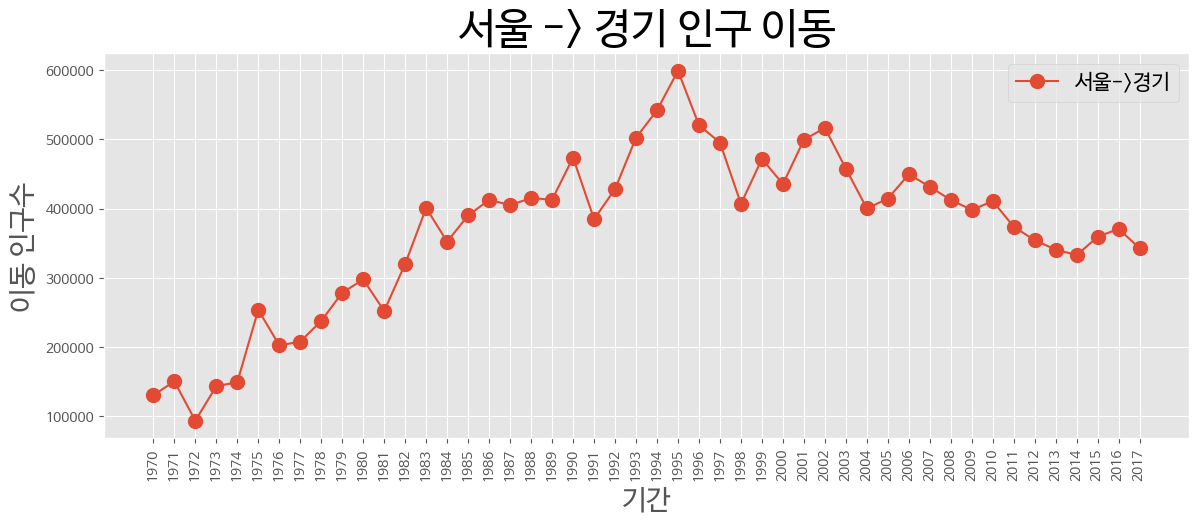

In [3]:
#스타일 서식 지정
plt.style.use('ggplot')
#그림사이즈 지정
plt.figure(figsize=(14,5))

#x축 눈금라벨 회전하기
plt.xticks(size=10, rotation='vertical')

#x,y축 데이터를  plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) #마커표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) #차트제목
plt.xlabel('기간', size=20) #x축 이름
plt.ylabel('이동 인구수',size=20) #y축 이름
plt.legend(labels=['서울->경기'], loc='best', fontsize=15) #범례표시

plt.show() #변경사항 저장하고 그래프 출력

In [4]:
#라이브러리 불러오기
import matplotlib.pyplot as plt

#스타일리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


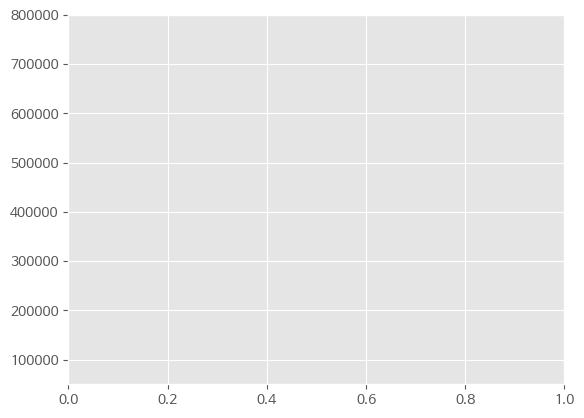

In [5]:
#y축 범위 지정(최소값, 최대값)
plt.ylim(50000,800000)

#주석 표시 - 화삺표
plt.annotate('',                                                      #화살표의 머리 부분(끝점)
             xy=(20,620000),                                          #화살표의 꼬리부분(시작점)
             xytext=(2, 290000),                                      #좌표체계
             xycoords = 'data',
             arrowprops = dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',                                                      #화살표의 머리 부분(끝점)
             xy=(47,450000),                                          #화살표의 꼬리부분(시작점)
             xytext=(30, 580000),                                      #좌표체계
             xycoords = 'data',
             arrowprops = dict(arrowstyle='->', color='olive', lw=5), #화살표 서식
             )

#주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', #텍스트 입력
             xy=(10,550000),              #텍스트 위치 기준점
             rotation = 25,               #텍스트 회전 각도
             va= 'baseline',              #텍스트 상하 정렬
             ha = 'center',               #텍스트 좌우 정렬
             fontsize=15,                 #텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)', #텍스트 입력
             xy=(40,560000),              #텍스트 위치 기준점
             rotation = -11,               #텍스트 회전 각도
             va= 'baseline',              #텍스트 상하 정렬
             ha = 'center',               #텍스트 좌우 정렬
             fontsize=15,                 #텍스트 크기
             )

plt.show()

<ipython-input-10-9669f70ce0e5>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-10-9669f70ce0e5>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


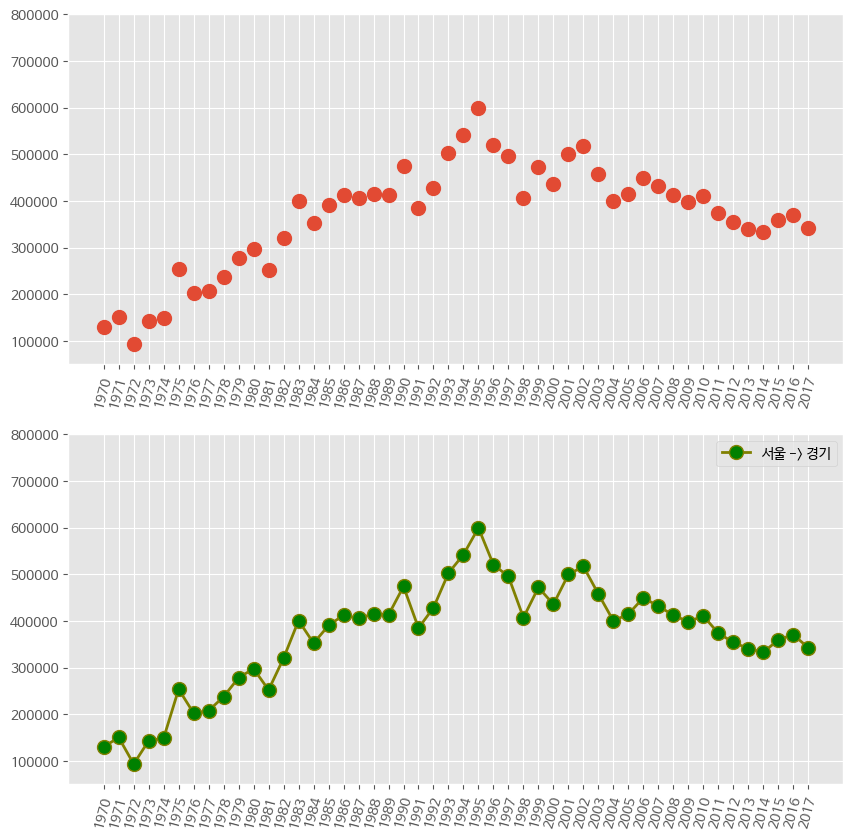

In [10]:
# 그래프 객체 생성
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#axe 객체에 plot함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color = 'olive', linewidth = 2, label='서울 -> 경기')
ax2.legend(loc='best')

#y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

<ipython-input-11-74e1a73d1305>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


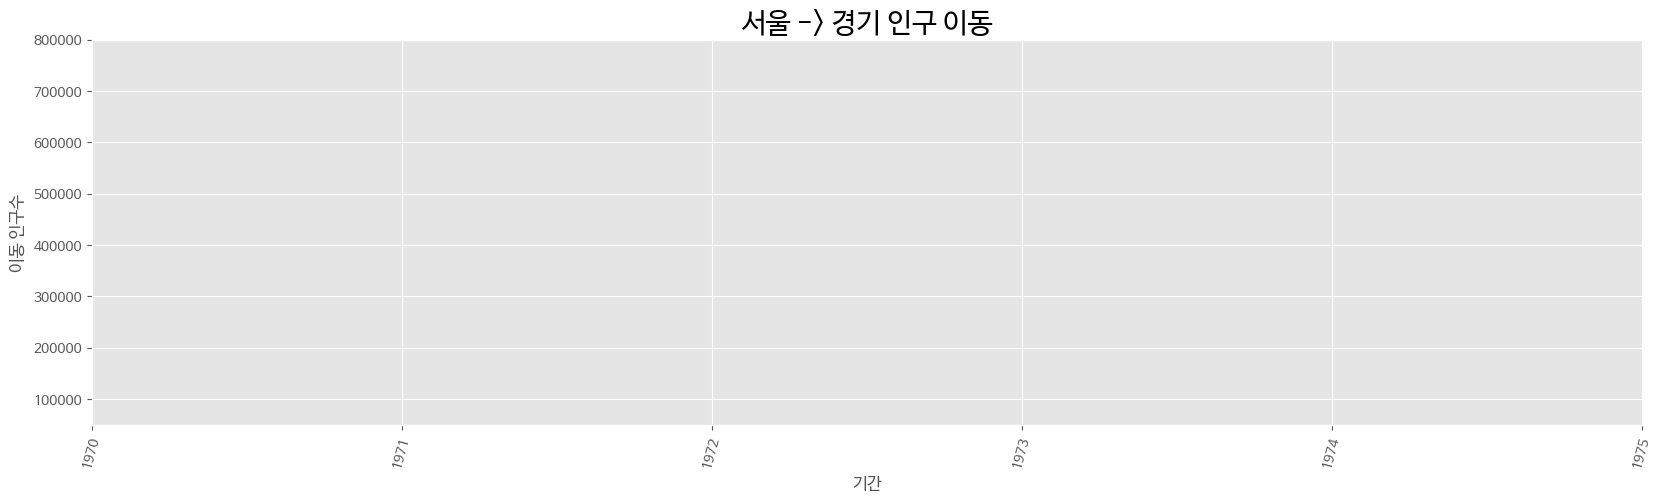

In [11]:
#그래프 객체 생성( fig1에 한개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

#y축 범위 지정 최소값 최대값
ax.set_ylim(50000,800000)

#axe 객체에 plot 함수로 그래프 출력
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color = 'olive', linewidth = 2, label='서울 -> 경기')
ax2.legend(loc='best')

#차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

#축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

#축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

#축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

<ipython-input-12-3909ca09de00>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


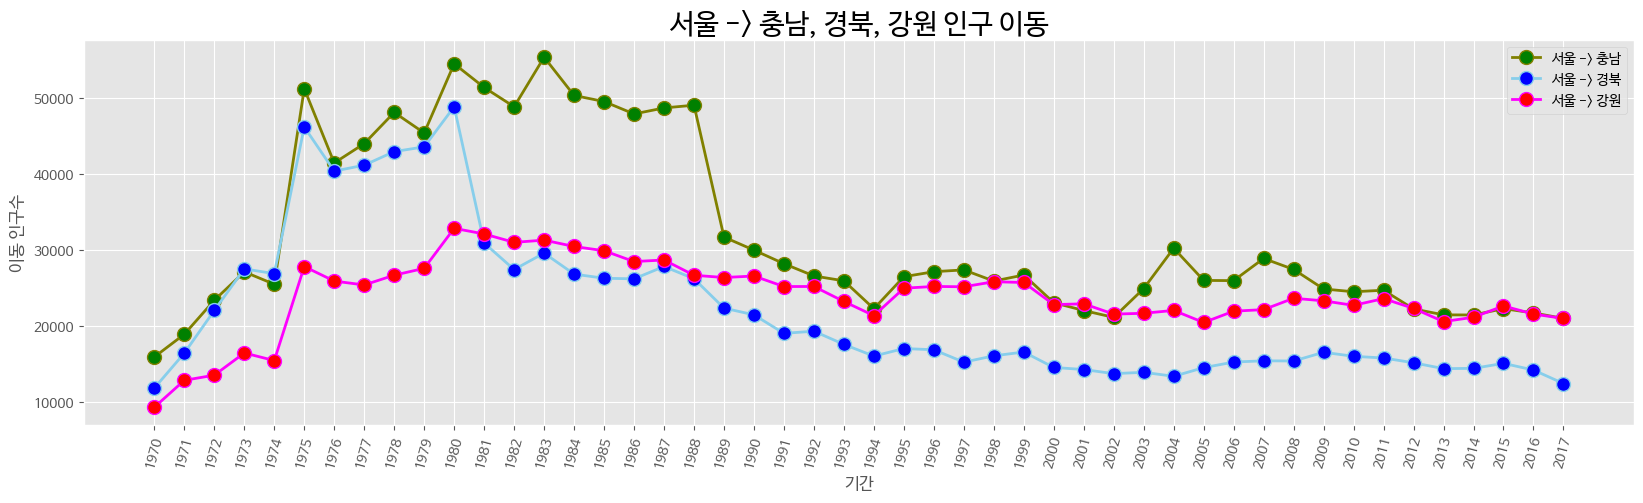

In [12]:
#서울에서 '충청남도', '경상북도', '강원도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor = 'green',
        markersize=10, color='olive', linewidth = 2, label ='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor = 'blue',
        markersize=10, color='skyblue', linewidth = 2, label ='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor = 'red',
        markersize=10, color='magenta', linewidth = 2, label ='서울 -> 강원')

#범례 표시
ax.legend(loc='best')

#차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

#축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

#축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

#축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

<ipython-input-13-f26408f7e04e>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-13-f26408f7e04e>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-13-f26408f7e04e>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-13-f26408f7e04e>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


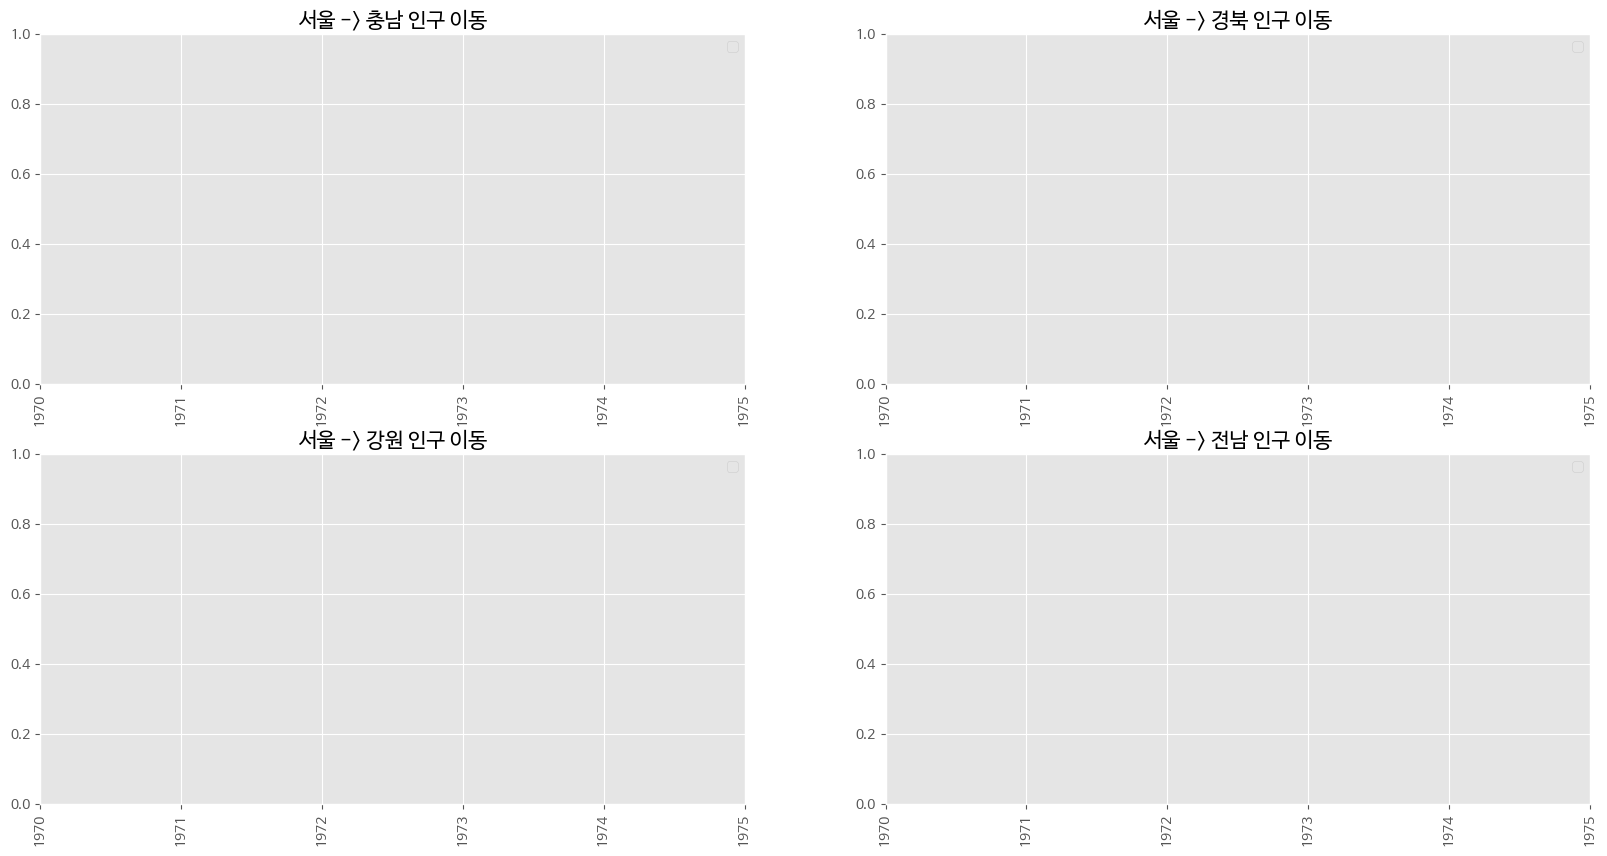

In [13]:
#서울에서 '충청남도', '경상북도', '강원도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor = 'green',
        markersize=10, color='olive', linewidth = 2, label ='서울 -> 충남')
ax.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor = 'blue',
        markersize=10, color='skyblue', linewidth = 2, label ='서울 -> 경북')
ax.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor = 'red',
        markersize=10, color='magenta', linewidth = 2, label ='서울 -> 강원')
ax.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor = 'orange',
        markersize=10, color='yellow', linewidth = 2, label ='서울 -> 전남')

#범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

#차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)


#축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

In [14]:
#coding utf-8

#라이브러리 불러오기
import matplotlib

#컬러 정보를 담을 빈 딕셔너리 생성
colors={}

#컬러 이름과 헥사코드 확인하여 딕셔너리에 입력
for name, hex in matplotlib.colors.cnames.items():
  colors[name] = hex

#딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

면적 그래프

plot 메서드에 kind='area'

stacked=False 옵션 지정시 각 열의 선 그래프들이 누적되지 않고 서로 겹치도록 표시된다.

stacked=True 옵션 지정 시 선 그래프들이 겹치지 않고 누적되는 그래프



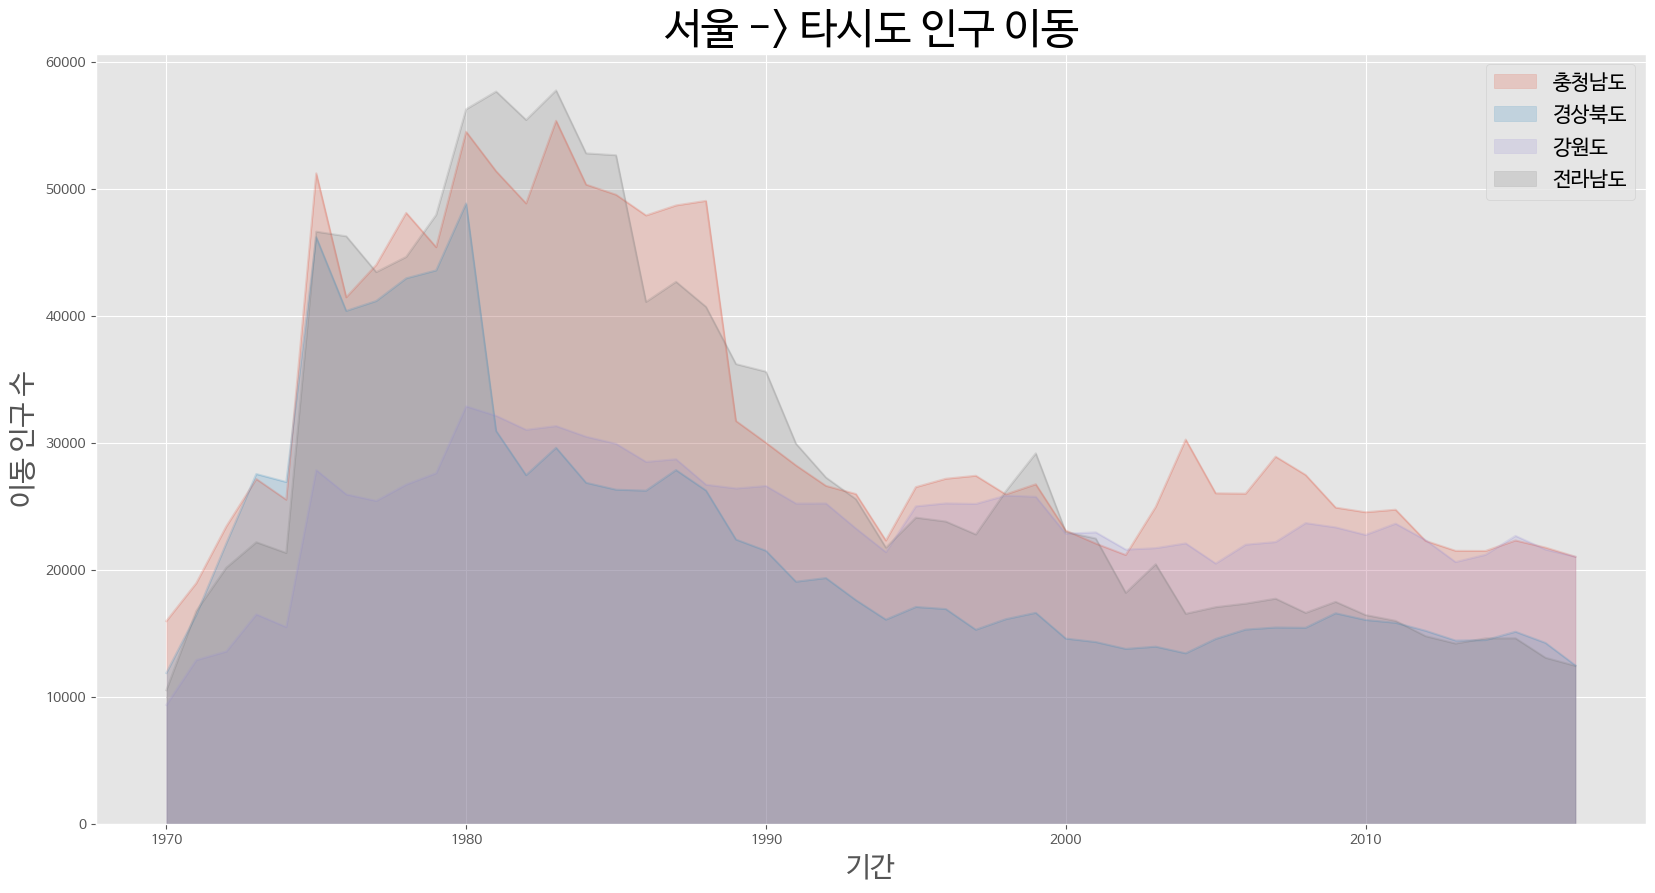

In [15]:
#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

#서울에서 '충청남도', '경상북도', '강원도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형으로 변경(엑스축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

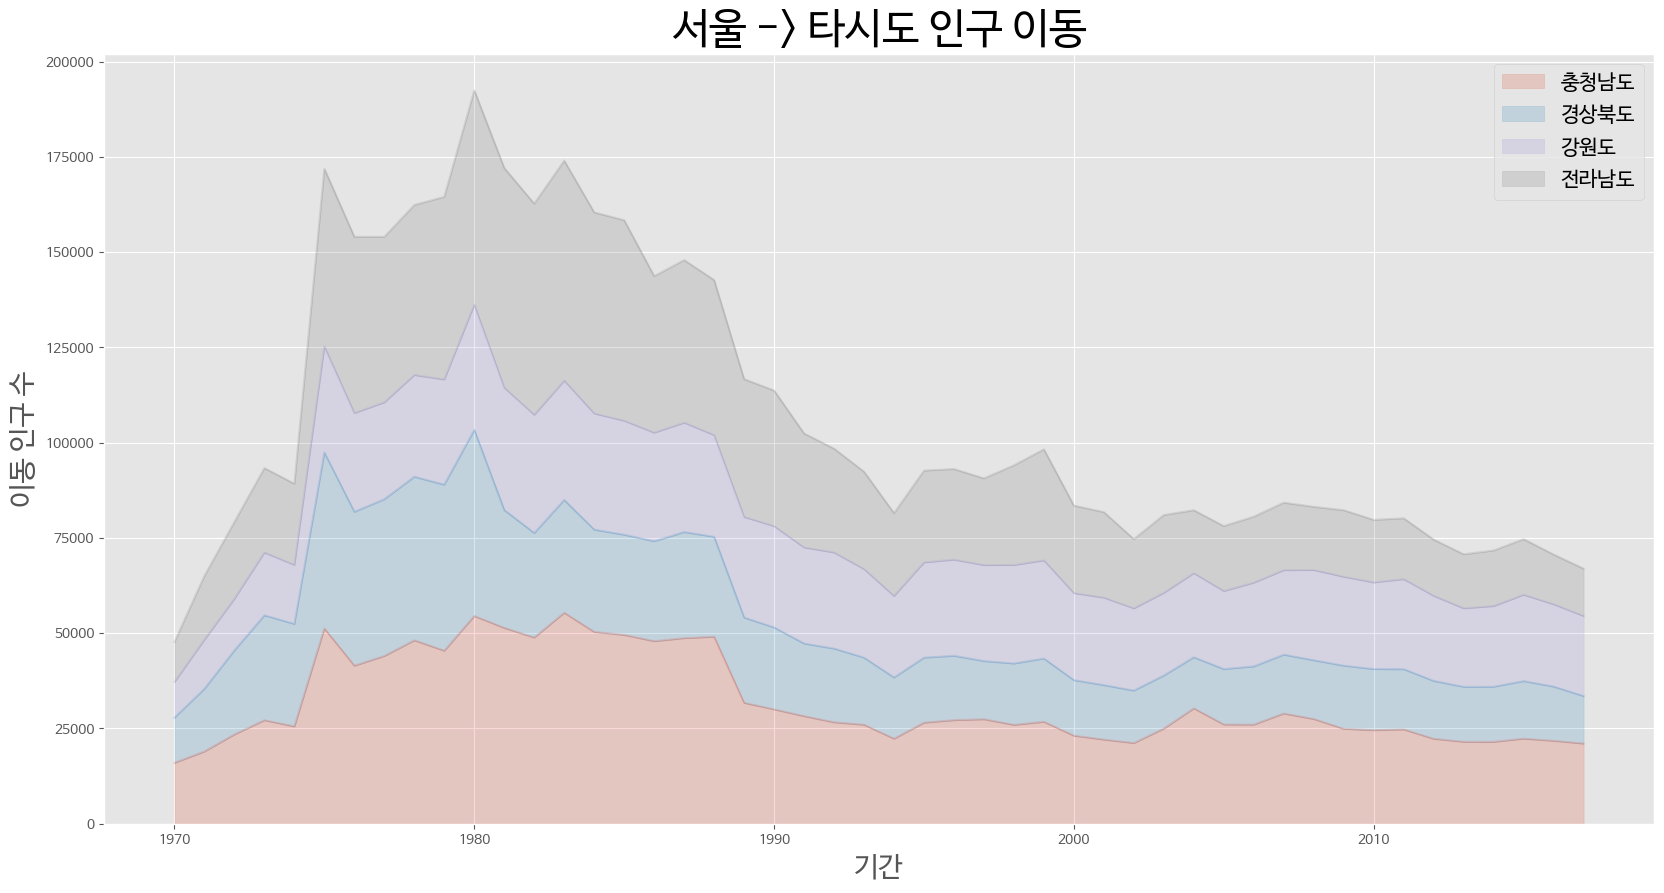

In [17]:
#데이터프레임의 인덱스를 정수형으로 변경 엑스축 눈금라벨 표시
df_4.index = df_4.index.map(int)

#면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

<class 'matplotlib.axes._axes.Axes'>


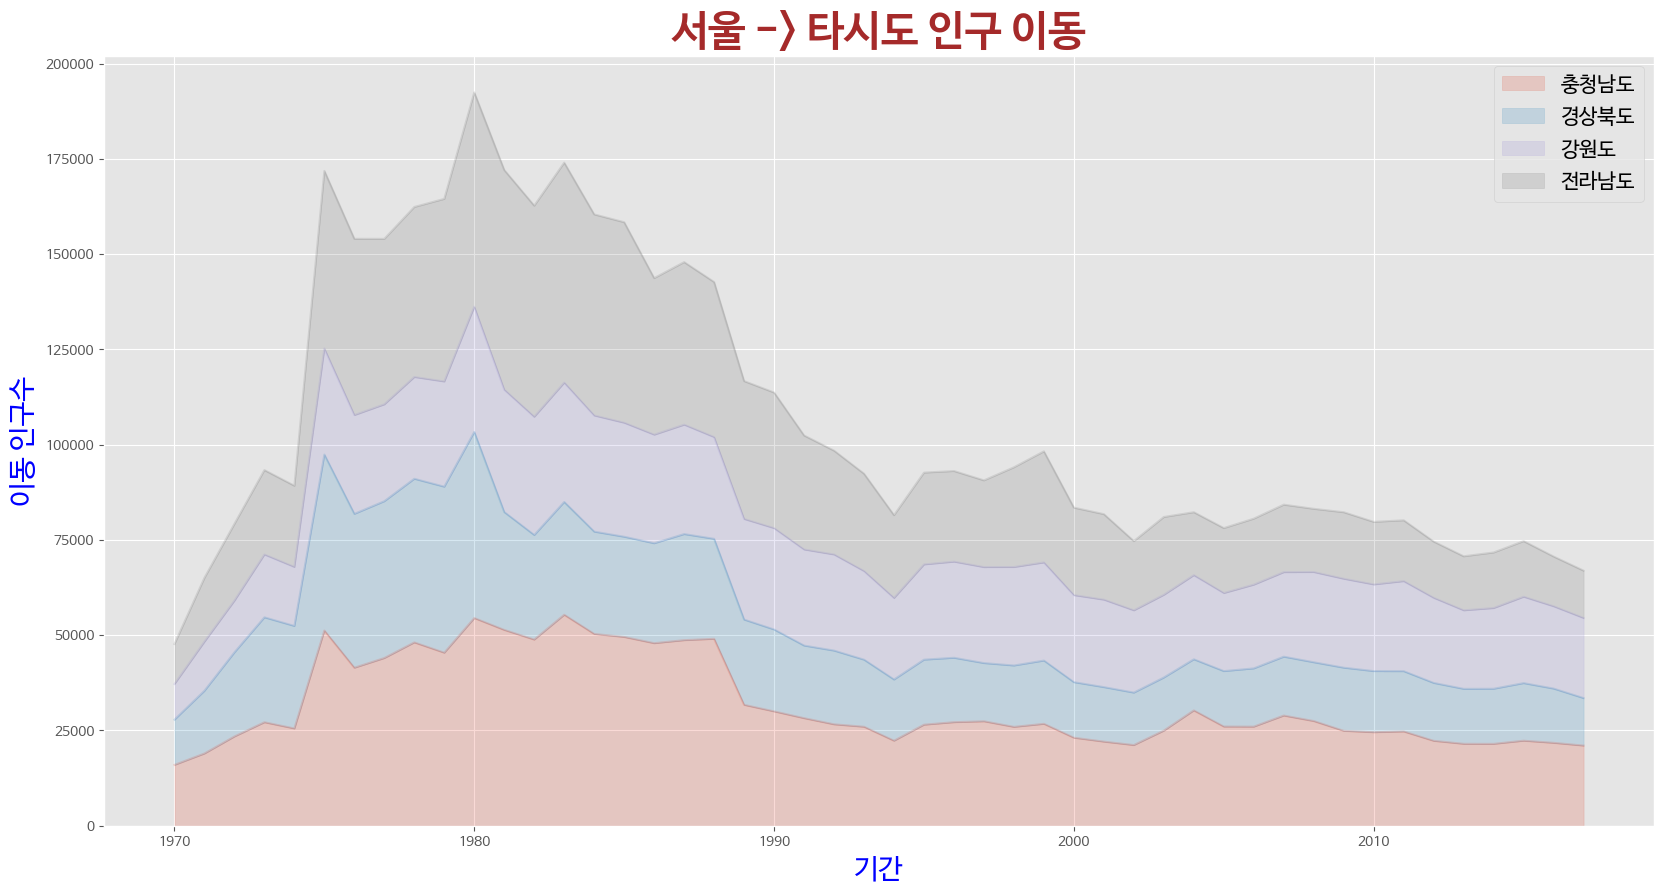

In [19]:
#데이터프레임의 인덱스를 정수형으로 변경 엑스축 눈금라벨 표시
df_4.index = df_4.index.map(int)

#면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))
print(type(ax))

#axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_xlabel('기간', size=20, color='blue')
ax.set_ylabel('이동 인구수', size=20, color='blue')
ax.legend(loc='best', fontsize=15)
plt.show()

막대 그래프

.plot 메소드에 kind='bar' 옵션 입력

'barh'는 가로

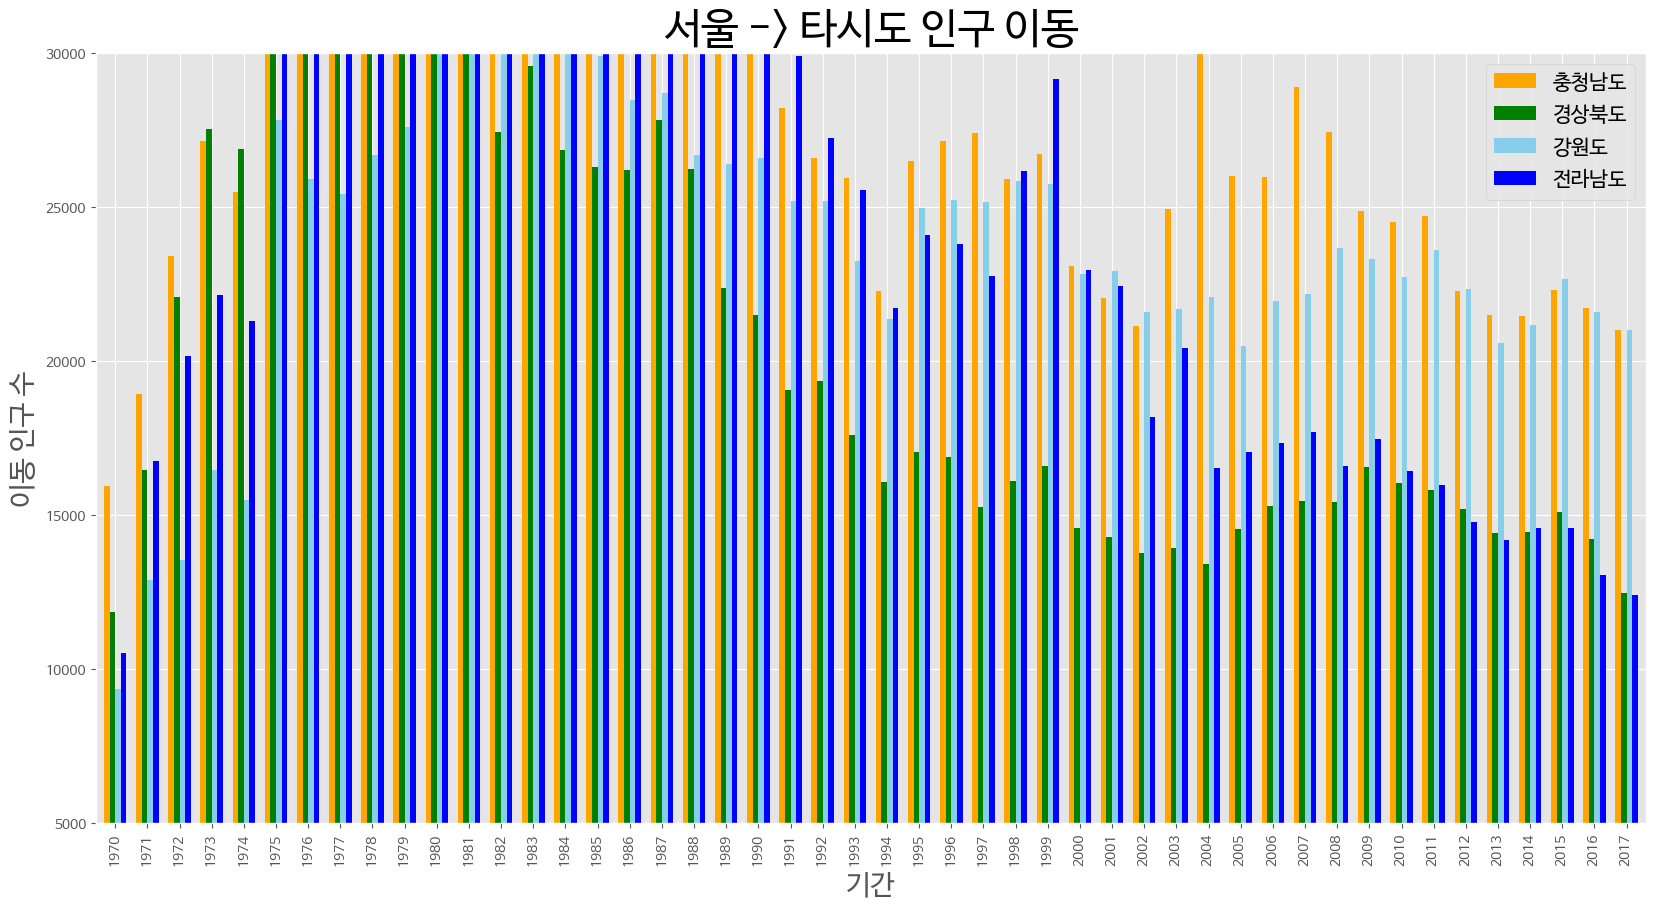

In [20]:
#서울에서 '충청남도', '경상북도', '강원도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형으로 변경 엑스축 눈금라벨 표시
df_4.index = df_4.index.map(int)

#막대 그래프 그리기
df_4.plot(kind='bar', figsize = (20,10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000,30000)
plt.legend(loc='best', fontsize=15)
plt.show()

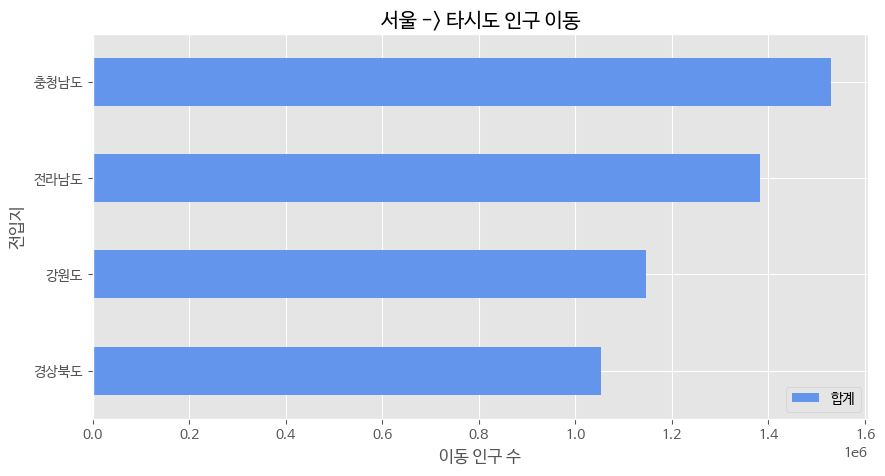

In [21]:
#서울에서 '충청남도', '경상북도', '강원도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

#2010-2017년 이동 인구 수를 합하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

#가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

#스탈 서식 지정
plt.style.use('ggplot')

#수평 막대그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

#한글 폰트 오류 해결

from matplotlib import font_manager, rc

font_path = "/content/drive/MyDrive/ESAA/data/malgun.ttf" #폰트파일위치

font_name = font_manager.FontProperties(fname=font_path).get_name()

rc('font', family=font_name)

<ipython-input-3-3629d328ea46>:13: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('/content/drive/MyDrive/ESAA/data/남북한발전전력량.xlsx', engine = 'openpyxl', convert_float=True)


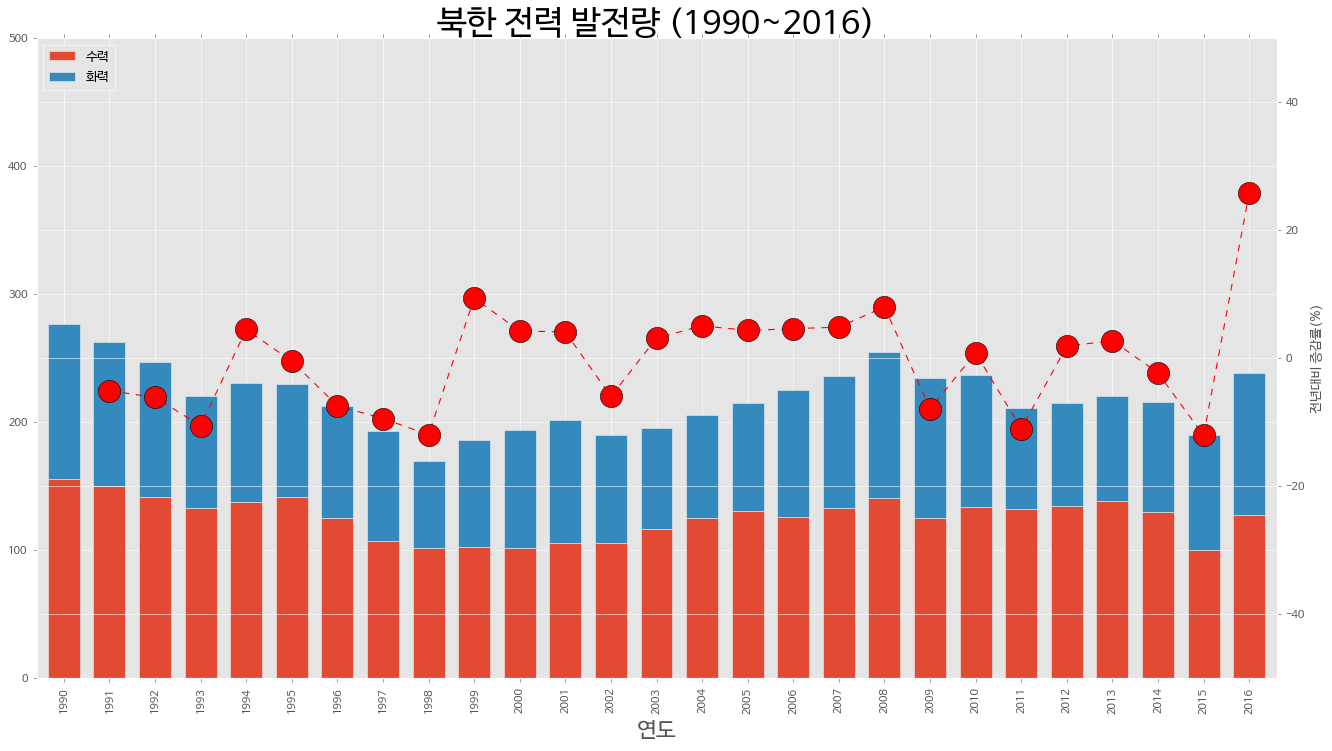

In [3]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.style.use('ggplot') #스탈 서식 지정
plt.rcParams['axes.unicode_minus'] = False #마이너스 부호 출력 설정

#엑셀 데이터를 데이터 프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/ESAA/data/남북한발전전력량.xlsx', engine = 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns',inplace = True)
df.set_index('발전 전력별', inplace=True)
df = df.T

#증감룰(변동률)계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1)*100

#2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker ='o', markersize = 20,
         color = 'red', label = '전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax2.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc = 'upper left')
plt.show()


히스토그램 plot메서드에 kind='hist' 넣는다

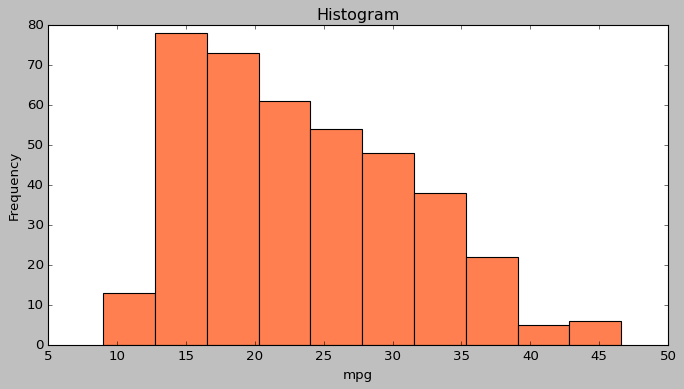

In [2]:
#히스토그램
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

#read_csv()함수로 df생성
df = pd.read_csv('/content/drive/MyDrive/ESAA/data/auto-mpg.csv', header=None)

#열이름지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight',
              'acceleration', 'model year', 'origin', 'name']

#연비 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

#그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

산점도: kind='scatter' 옵션

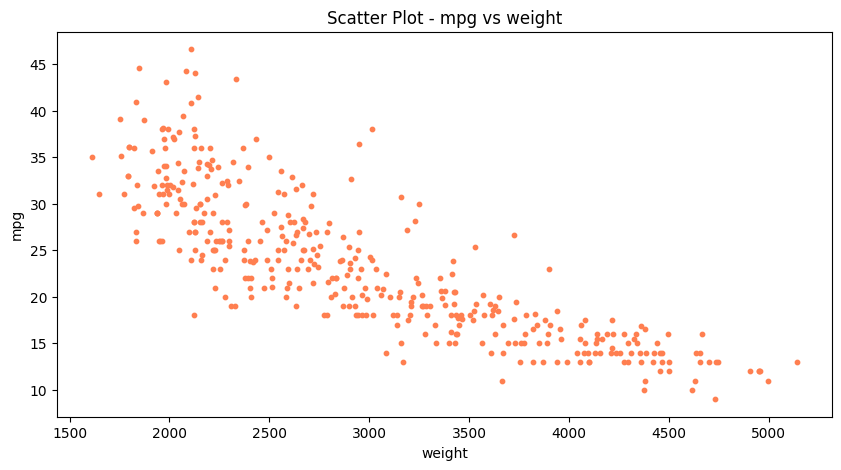

In [4]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

#read_csv()함수로 df생성
df = pd.read_csv('/content/drive/MyDrive/ESAA/data/auto-mpg.csv', header=None)

#열이름지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight',
              'acceleration', 'model year', 'origin', 'name']

#연비와 차중에 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

버블차트

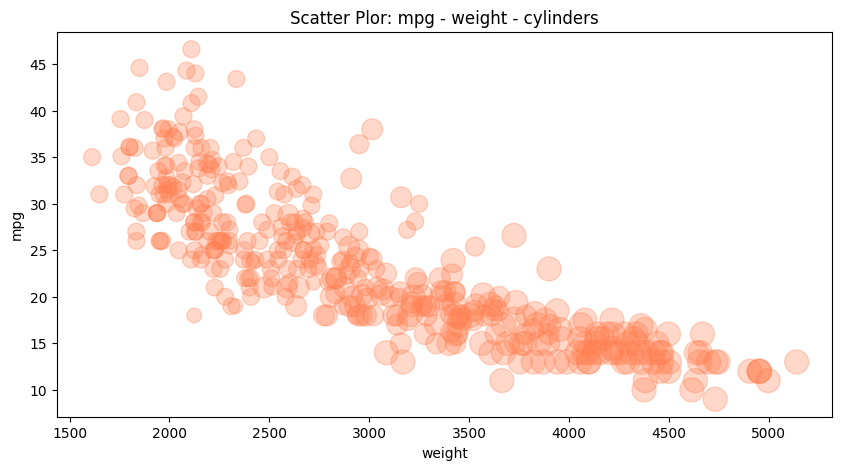

In [5]:
#실린더 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() * 300

#3개의 변수로 산점도 그리기
df.plot(kind= 'scatter', x='weight', y='mpg', c='coral', figsize=(10,5),
        s=cylinders_size, alpha = 0.3)
plt.title('Scatter Plor: mpg - weight - cylinders')
plt.show()


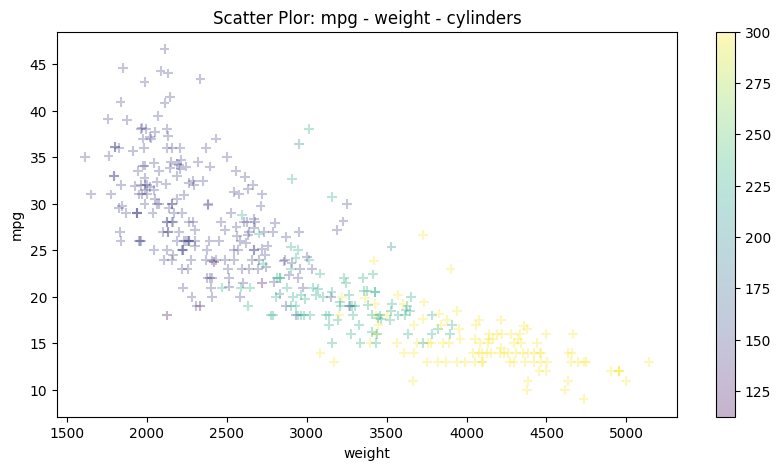

In [6]:
#실린더 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() * 300

#3개의 변수로 산점도 그리기
df.plot(kind= 'scatter', x='weight', y='mpg', marker='+', figsize=(10,5),
        cmap = 'viridis', c= cylinders_size, s=50, alpha = 0.3)
plt.title('Scatter Plor: mpg - weight - cylinders')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent = True)
plt.show()

파이 차트 kind='pie'

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


<ipython-input-7-4f167160f3e5>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum()


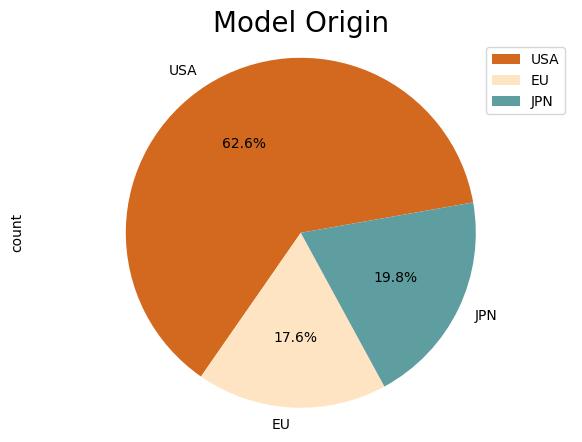

In [7]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

#read_csv()함수로 df생성
df = pd.read_csv('/content/drive/MyDrive/ESAA/data/auto-mpg.csv', header=None)

#열이름지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight',
              'acceleration', 'model year', 'origin', 'name']

#데이터 개수 카운트를 위해 값을 1을 가진 열 추가
df['count'] = 1
#오리진 열을 기준으로 그룹화, 합계 연산
df_origin = df.groupby('origin').sum()

#그룹 연산 결과 출력
print(df_origin.head())

#제조국가 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JPN']

#제조국가 열에 대한 파이 차트 그리기 - COUNT 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%',  # #표시
                        startangle = 10,    # 파이 조각을 나누는 시작점 각도 표시
                        colors = ['chocolate', 'bisque', 'cadetblue'] #색상 리스트
                        )
plt.title('Model Origin', size=20)
plt.axis('equal') #파이 차트의 비율을 길게(원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc = 'upper right') #범례 표시
plt.show()

박스 플롯

범주형 데이터의 분포를 파악하는 데 적합

최소값, 1분위값, 중간값, 3분위값, 최대

<ipython-input-9-f003695df55c>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster') #스타일 서식 지정


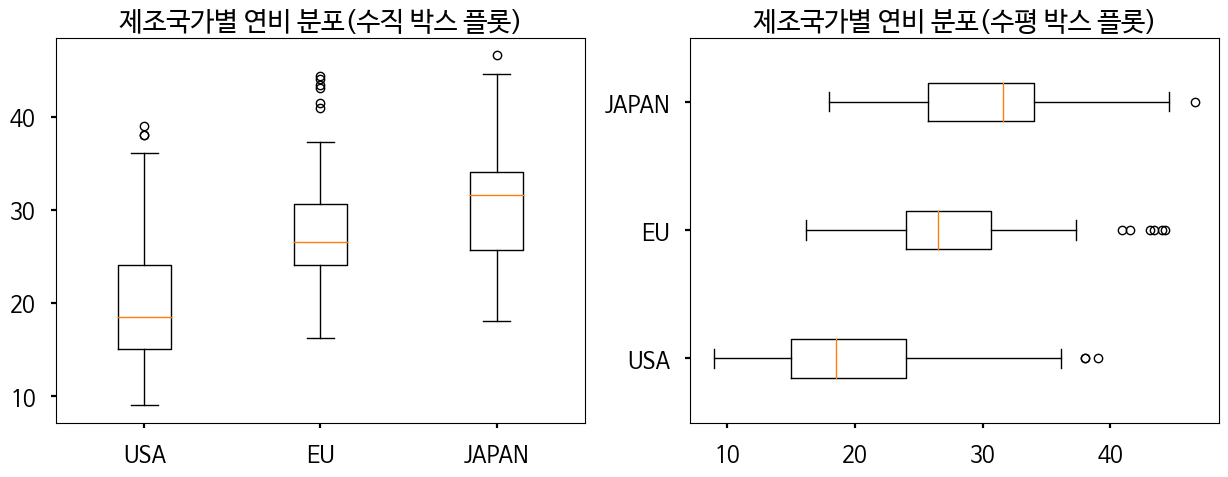

In [9]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#한글 폰트 오류 해결
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.style.use('seaborn-poster') #스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 설정

#read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/ESAA/data/auto-mpg.csv', header=None)

#열이름지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight',
              'acceleration', 'model year', 'origin', 'name']

#그래프 객체 생성 (figure에 두개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels = ['USA', 'EU', 'JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels = ['USA', 'EU', 'JAPAN'],
            vert=False)
ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')
plt.show()